In [376]:
# default
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [377]:
total2 = pd.read_csv('../Data/02.통합.csv', index_col=0)

In [378]:
total2.shape

(136, 13)

In [379]:
total2.tail()

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,빈집수,"협회 및 단체, 수리 및 기타 개인서비스업 소멸",도매 및 소매업 신생,교육서비스업 소멸,예금은행대출금액,예금액
131,2020,충청북도,1600837,226441,8607,40,85135,76877.0,1265,6103,591,28669.1,27669.5
132,2020,대전광역시,1463882,243418,7481,44,79807,26983.0,1240,6405,739,39341.3,38725.4
133,2020,강원도,1542840,217897,7835,32,73478,84106.0,1285,5554,683,22831.4,23634.2
134,2020,제주특별자치도,674635,94736,3989,23,40575,35105.0,595,2856,398,20182.3,14025.4
135,2020,세종특별자치시,355831,65909,3468,7,29487,14385.0,208,1361,339,9864.7,251734.3


In [380]:
total2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 135
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   년도                          136 non-null    int64  
 1   시도                          136 non-null    object 
 2   총인구                         136 non-null    int64  
 3   전출인구                        136 non-null    int64  
 4   출생아수                        136 non-null    int64  
 5   산부인과의원수                     136 non-null    int64  
 6   초등학생인원수                     136 non-null    int64  
 7   빈집수                         102 non-null    float64
 8   협회 및 단체, 수리 및 기타 개인서비스업 소멸  136 non-null    int64  
 9   도매 및 소매업 신생                 136 non-null    int64  
 10  교육서비스업 소멸                   136 non-null    int64  
 11  예금은행대출금액                    136 non-null    float64
 12  예금액                         136 non-null    float64
dtypes: float64(3), int64(9), object(1)


In [381]:
# 상관 계수 막대 그래프 찍는 함수 
# a = 시작 컬럼 인덱스, b = 끝 컬럼 인덱스
def DfNameIstotal2makeCorrHeatMap(a, b):
    plt.figure(figsize = (10,6))

    sns.heatmap(
        total2.iloc[:,a:b].corr(),
        annot=True,
        annot_kws={"size": 10},
        linewidths= 0.5,
    )
    plt.show()


In [382]:

def DfNameIstotal2makeCorrHeatMapYear(a, b, c):
    plt.figure(figsize = (10,6))
    sns.heatmap(
        total2[total2['년도']==c].iloc[:,a:b].corr(),
        annot=True,
        annot_kws={"size": 10},
        linewidths= 0.5,
    )
    plt.show()  

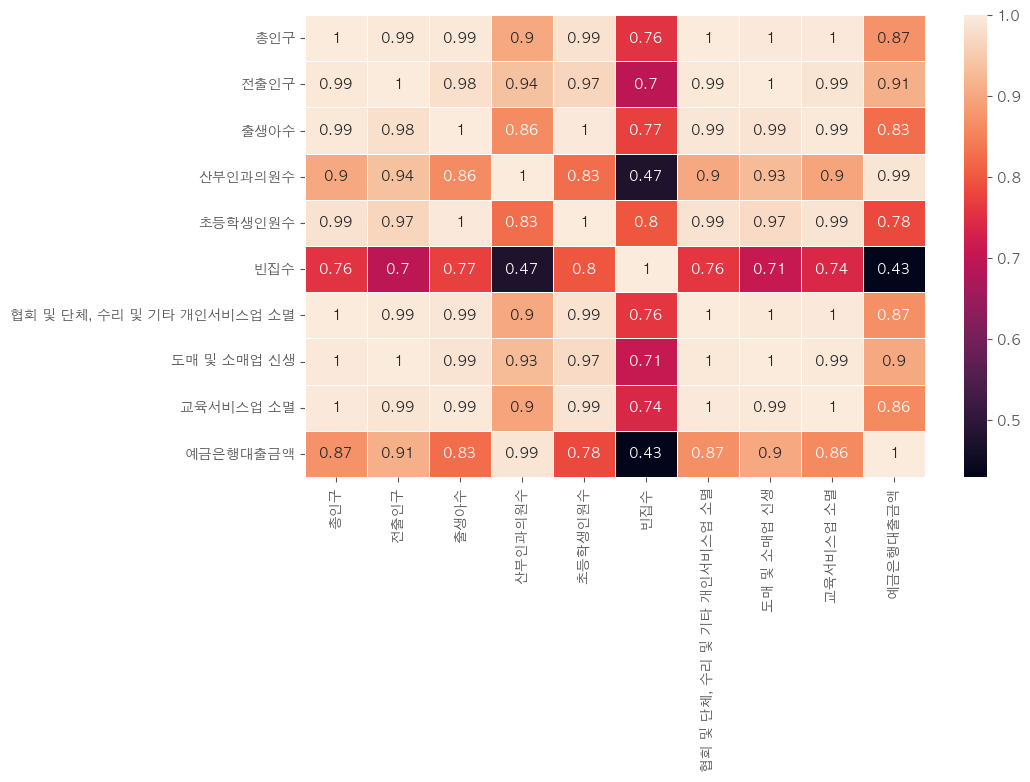

In [383]:
DfNameIstotal2makeCorrHeatMapYear(1,12,2020)

In [384]:
from sklearn.cluster import KMeans

In [385]:
print(total2[total2['빈집수'].isna()].head(1)['년도'])
print(total2[total2['빈집수'].isna()].tail(1)['년도'])

0    2013
Name: 년도, dtype: int64
33    2014
Name: 년도, dtype: int64


In [386]:
total2['시도'].unique()

array(['경기도', '서울특별시', '경상남도', '부산광역시', '대구광역시', '인천광역시', '전라북도', '경상북도',
       '광주광역시', '충청남도', '전라남도', '울산광역시', '충청북도', '대전광역시', '강원도',
       '제주특별자치도', '세종특별자치시'], dtype=object)

In [387]:
total2.columns
kmtotal1 = total2[['년도', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '빈집수',
       '협회 및 단체, 수리 및 기타 개인서비스업 소멸', '도매 및 소매업 신생', '교육서비스업 소멸', '예금은행대출금액',
       '예금액']]
# kmtotal1 = total2[['년도', '전출인구', '출생아수']]

In [388]:
total2['년도'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

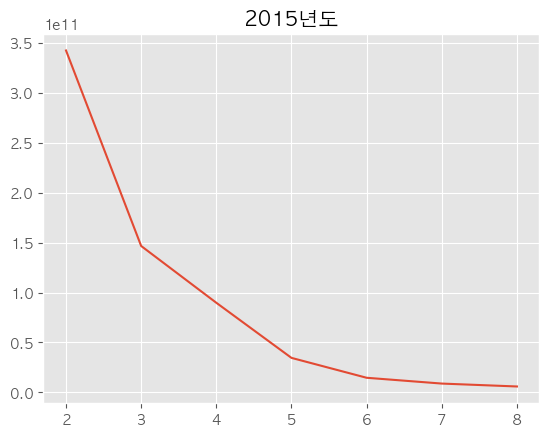

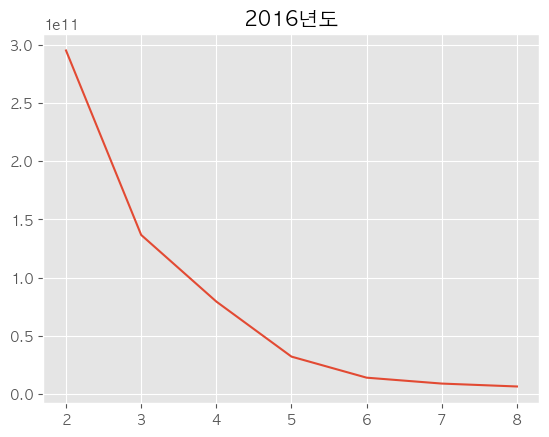

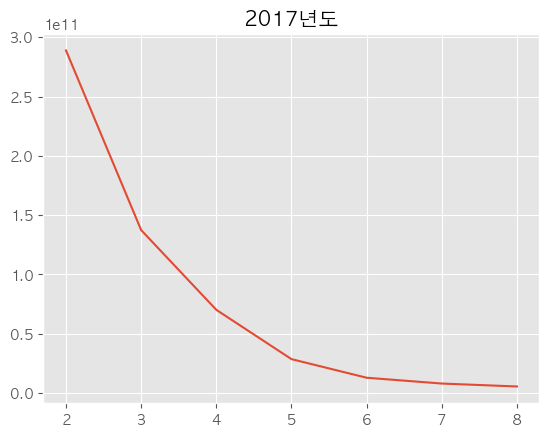

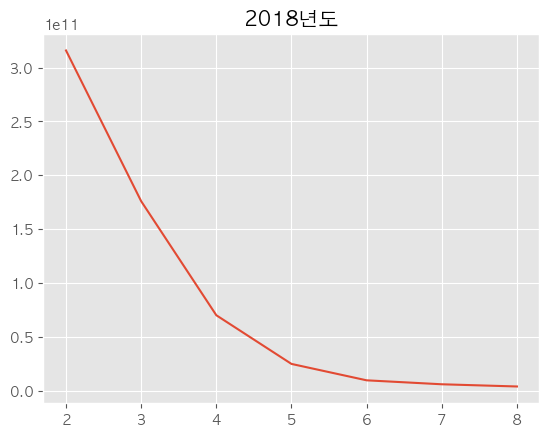

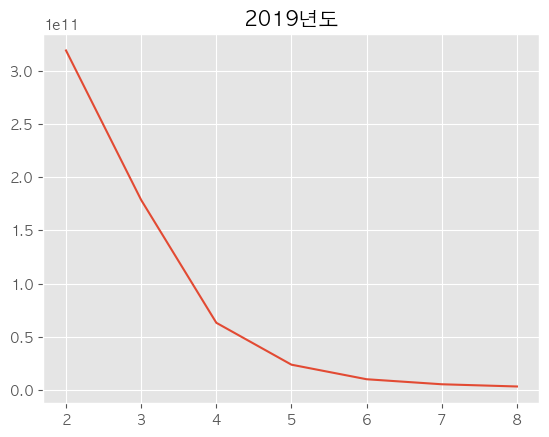

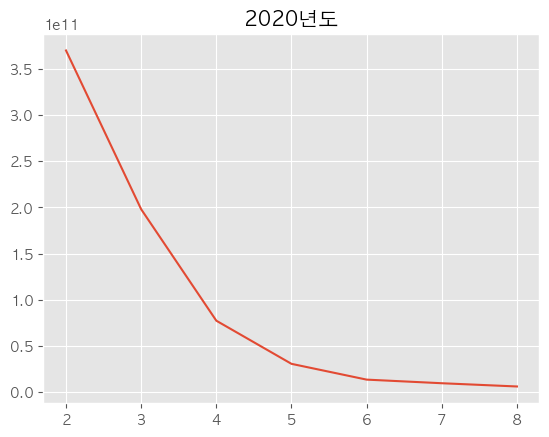

In [389]:
# kmtotal1 = total2[['년도', '출생아수', '산부인과의원수', '초등학생인원수']]
kmtotal1 = total2[['년도', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수']]

scores = []
for year in list(kmtotal1[kmtotal1['년도']>=2015]['년도'].unique()):
    for k in range(2,9): 
        km = KMeans(n_clusters=k)
        km.fit(kmtotal1[kmtotal1['년도']==year])
        scores.append(km.inertia_)
    plt.plot(range(2,9), scores)
    plt.title('%d년도'%year)
    plt.show()
    scores=[]

In [390]:
len(scores)

0

In [391]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(kmtotal1)
km.labels_

array([1, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0,
       0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2], dtype=int32)

In [392]:
checkKmTotal1 = kmtotal1.copy()
checkKmTotal1['cluster_id'] = km.labels_

In [393]:
checkKmTotal1.sort_values(by='cluster_id', ascending=False)

,년도,전출인구,출생아수,산부인과의원수,초등학생인원수,cluster_id
135,2020,65909,3468,7,29487,2
64,2016,229883,12436,47,85939,2
62,2016,155812,10910,32,65629,2
61,2016,237337,13980,22,92981,2
60,2016,271446,17302,46,115309,2
...,...,...,...,...,...,...
92,2018,318671,16079,54,129290,0
87,2018,395524,21224,59,191016,0
39,2015,463685,25491,65,157099,0
38,2015,364364,19438,85,129583,0


In [394]:
df = checkKmTotal1[checkKmTotal1['년도']==2020]
df

,년도,전출인구,출생아수,산부인과의원수,초등학생인원수,cluster_id
119,2020,1984199,77737,265,761731,1
120,2020,1642977,47445,385,409536,1
121,2020,419997,16823,59,190849,0
122,2020,506176,15058,67,153527,0
123,2020,364083,11193,87,122587,0
124,2020,460304,16040,60,156928,0
125,2020,257577,8165,48,94661,2
126,2020,334679,12873,53,129079,0
127,2020,232246,7318,36,86419,2
128,2020,286386,11950,43,120115,2


In [395]:
list(df.columns)

['년도', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수', 'cluster_id']

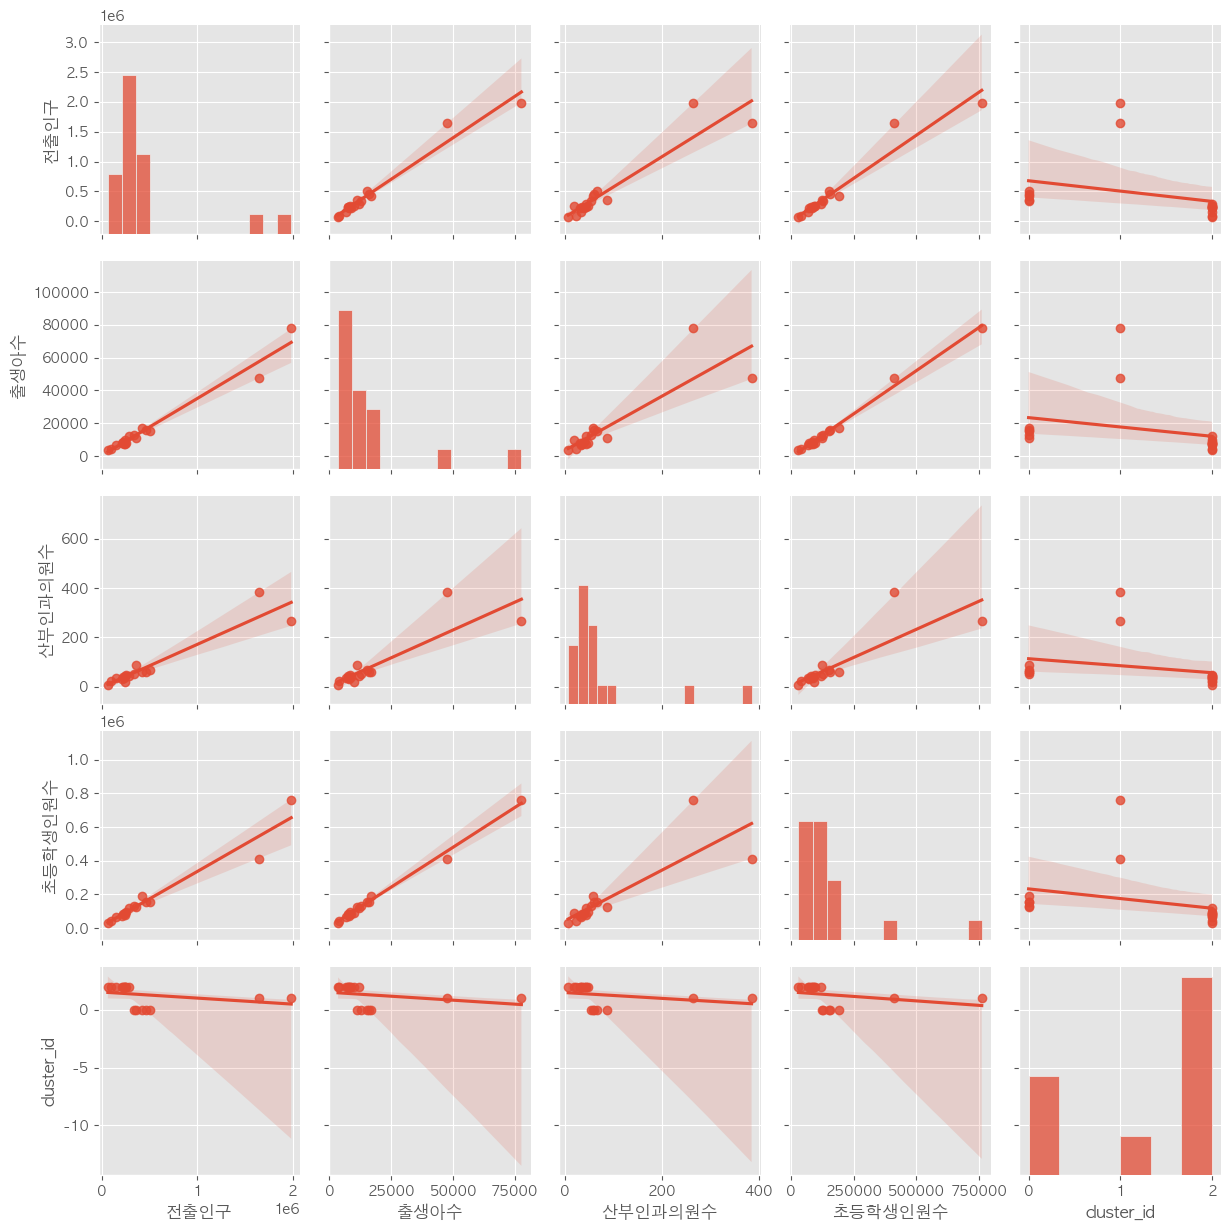

In [396]:
sns.pairplot(
    df,
    vars = ['전출인구', '출생아수', '산부인과의원수', '초등학생인원수', 'cluster_id'],
    kind = 'reg'
)

plt.show()

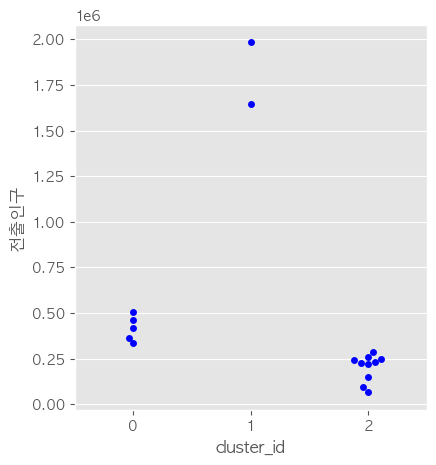

In [397]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
sns.swarmplot(
    y = checkKmTotal1[checkKmTotal1['년도']==2020]['전출인구'],
    x = checkKmTotal1[checkKmTotal1['년도']==2020]['cluster_id'],
    data = checkKmTotal1,
    ax = ax1,
    color='blue'
    # palette = 'Set1'
    # hue = 'class',
)
# ax2 = ax1.twinx() 
# sns.swarmplot(
#     y = checkKmTotal1[checkKmTotal1['년도']==2020]['산부인과의원수'],
#     x = checkKmTotal1[checkKmTotal1['년도']==2020]['cluster_id'],
#     data = checkKmTotal1,
#     ax = ax2,
#     color='red'
#     )
# ax3 = ax2.twinx() 
# sns.swarmplot(
#     y = checkKmTotal1[checkKmTotal1['년도']==2020]['전출인구'],
#     x = checkKmTotal1[checkKmTotal1['년도']==2020]['cluster_id'],
#     data = checkKmTotal1,
#     ax = ax3,
#     color='green'
#     )

plt.show()

In [398]:
checkKmTotal1

,년도,전출인구,출생아수,산부인과의원수,초등학생인원수,cluster_id
0,2013,1821303,112129,286,739619,1
1,2013,1620640,84066,395,469392,1
2,2013,423864,29504,65,190166,0
3,2013,496161,25831,82,160821,0
4,2013,363224,19340,86,136309,0
...,...,...,...,...,...,...
131,2020,226441,8607,40,85135,2
132,2020,243418,7481,44,79807,2
133,2020,217897,7835,32,73478,2
134,2020,94736,3989,23,40575,2


In [399]:
total3 = pd.read_csv('../Data/02.통합.csv', index_col=0)

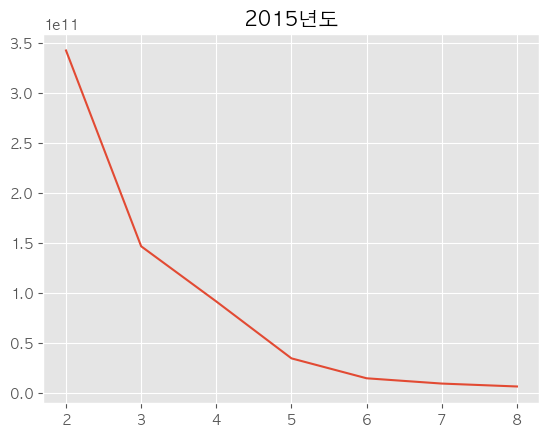

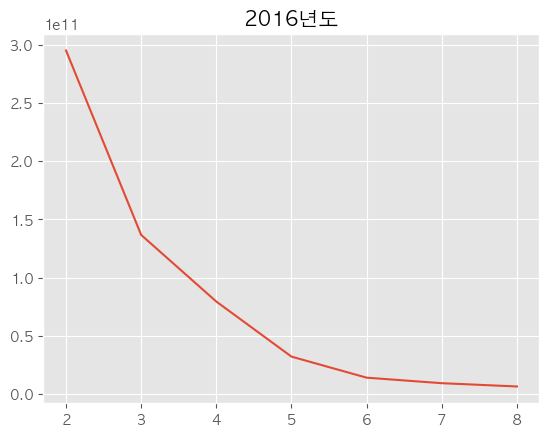

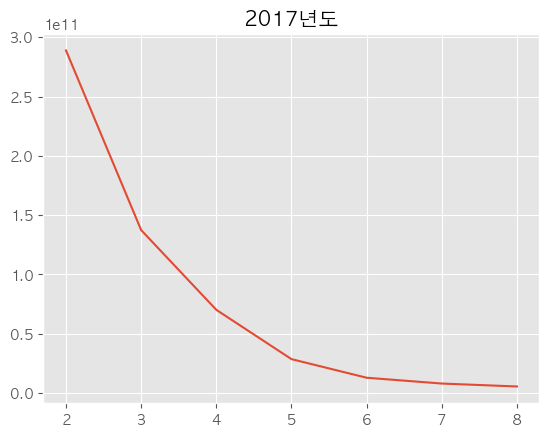

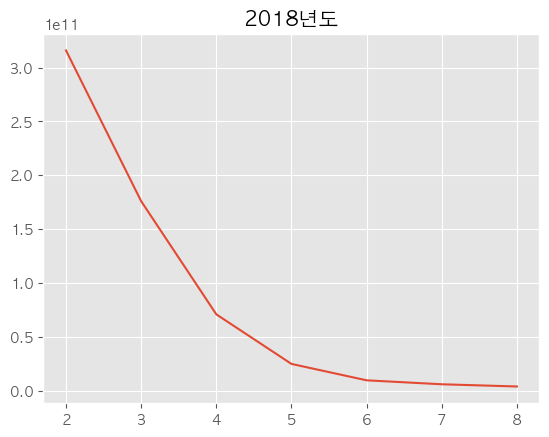

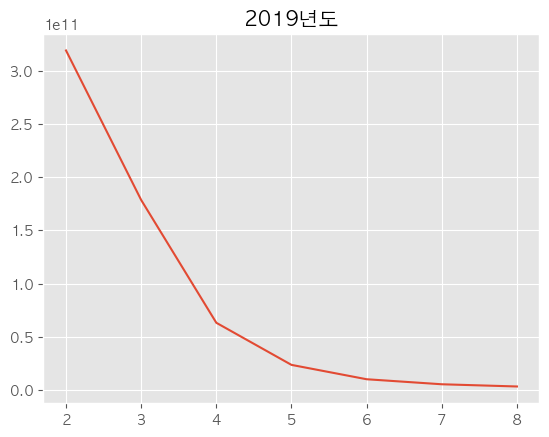

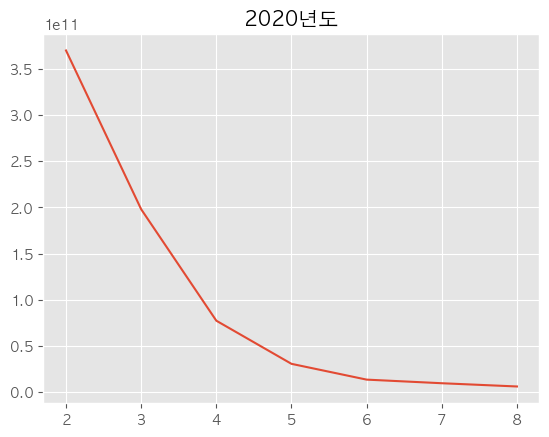

In [400]:
# kmtotal1 = total2[['년도', '출생아수', '산부인과의원수', '초등학생인원수']]
kmtotal1 = total2[['년도', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수']]

scores = []
for year in list(kmtotal1[kmtotal1['년도']>=2015]['년도'].unique()):
    for k in range(2,9): 
        km = KMeans(n_clusters=k)
        km.fit(kmtotal1[kmtotal1['년도']==year])
        scores.append(km.inertia_)
    plt.plot(range(2,9), scores)
    plt.title('%d년도'%year)
    plt.show()
    scores=[]

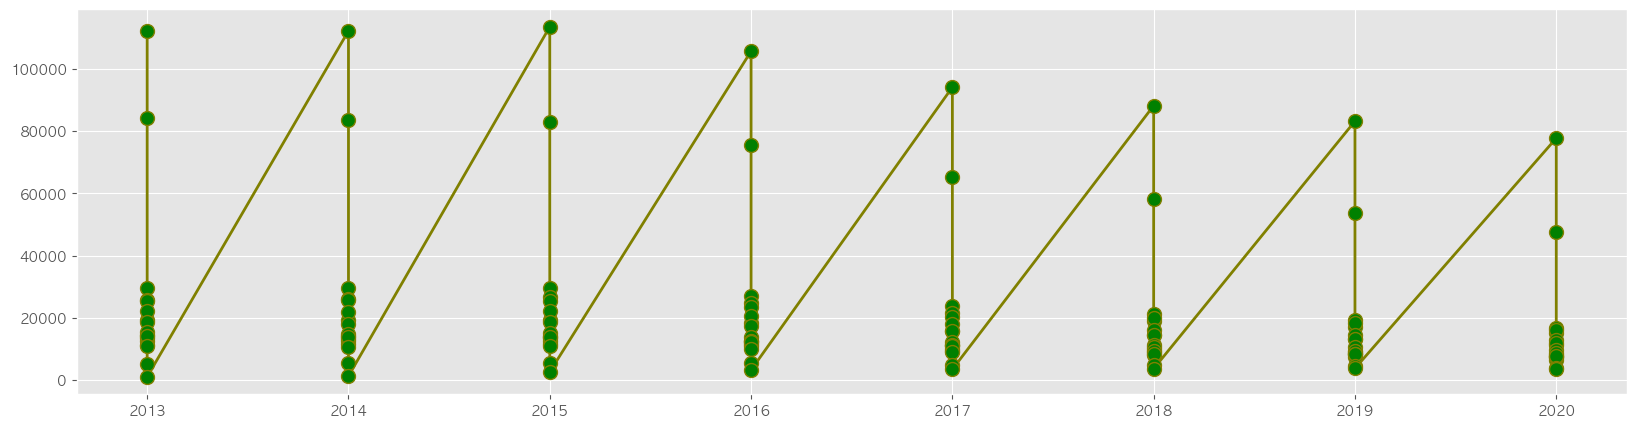

In [401]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

ax.plot(
    total3['년도'],
    total3['출생아수'],
    marker="o",
    markerfacecolor="green",
    markersize=10,
    color="olive",
    linewidth=2,
)

In [402]:
total3[total3['빈집수'].isna()]

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,빈집수,"협회 및 단체, 수리 및 기타 개인서비스업 소멸",도매 및 소매업 신생,교육서비스업 소멸,예금은행대출금액,예금액
0,2013,경기도,12234630,1821303,112129,286,739619,NaN,7235,49143,6822,248468.3,13718.5
1,2013,서울특별시,10143645,1620640,84066,395,469392,NaN,6229,48097,4749,462443.1,532689.2
2,2013,경상남도,3333820,423864,29504,65,190166,NaN,1933,12612,1530,57288.6,6703.3
3,2013,부산광역시,3527635,496161,25831,82,160821,NaN,2093,13902,1510,77411.6,59554.5
4,2013,대구광역시,2501588,363224,19340,86,136309,NaN,1301,9981,1188,46578.5,37541.7
5,2013,인천광역시,2879782,439578,25560,69,157918,NaN,1769,11522,1192,62378.3,31197.4
6,2013,전라북도,1872965,260395,14555,52,105135,NaN,974,6935,732,22597.6,15924.7
7,2013,경상북도,2699440,330983,22206,57,135237,NaN,1361,9127,987,28452.3,35242.6
8,2013,광주광역시,1472910,229288,12729,45,96055,NaN,1086,6342,775,23082.8,18041.6
9,2013,충청남도,2047631,268053,18628,47,116216,NaN,1171,7662,854,26445.4,17957.6


In [403]:
tongtong = pd.read_csv('../Data/03.통합.csv', index_col=0)

In [404]:
list(tongtong['시도'].unique())

['경기도',
 '서울특별시',
 '경상남도',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '전라북도',
 '경상북도',
 '광주광역시',
 '충청남도',
 '전라남도',
 '울산광역시',
 '충청북도',
 '대전광역시',
 '강원도',
 '제주특별자치도',
 '세종특별자치시']

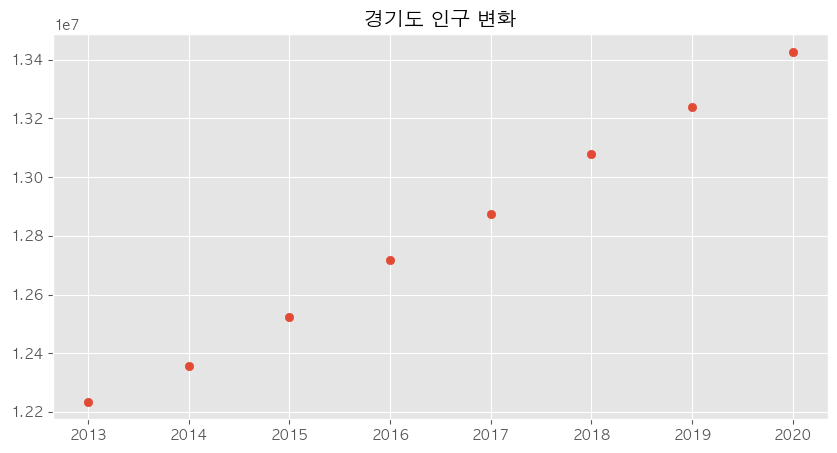

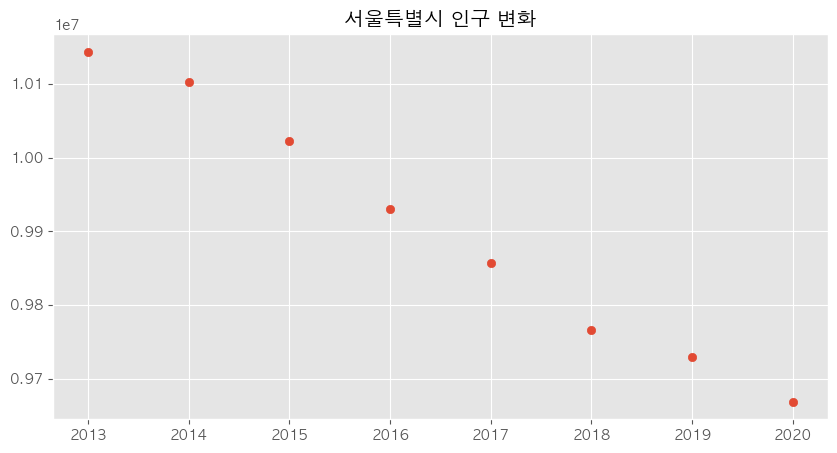

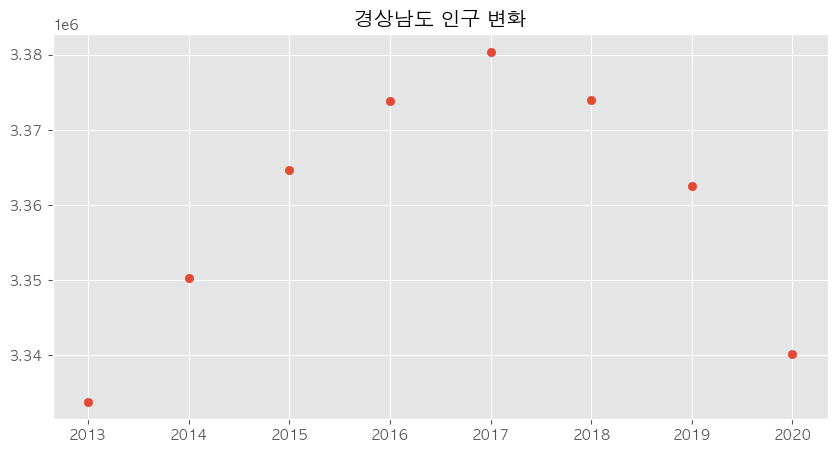

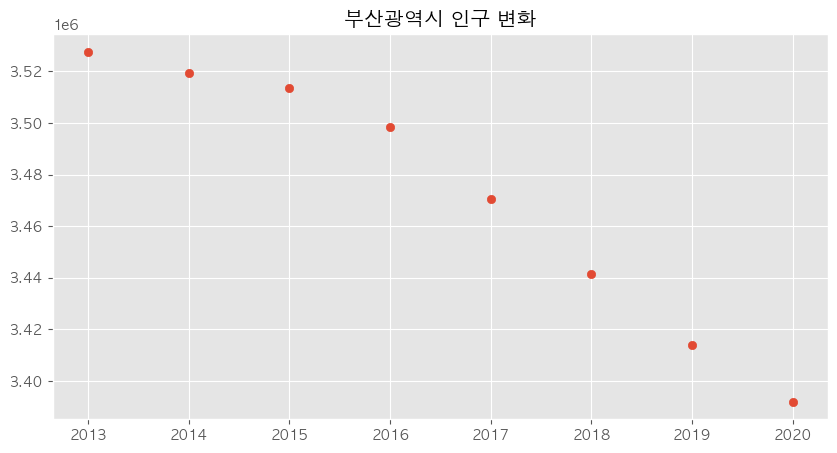

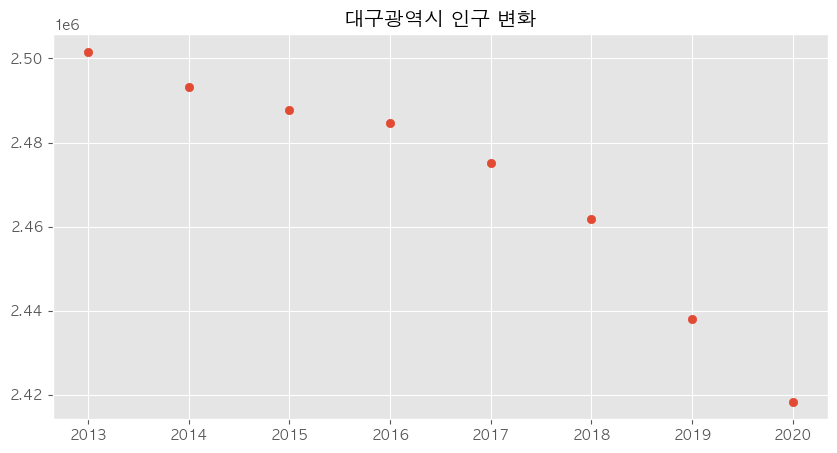

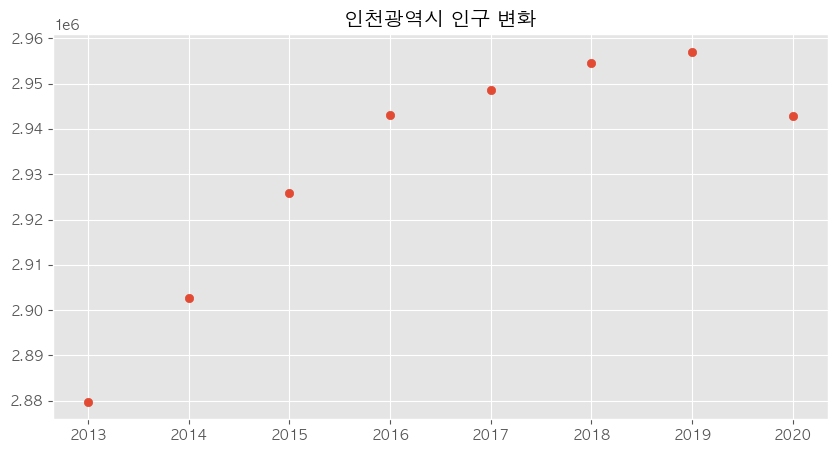

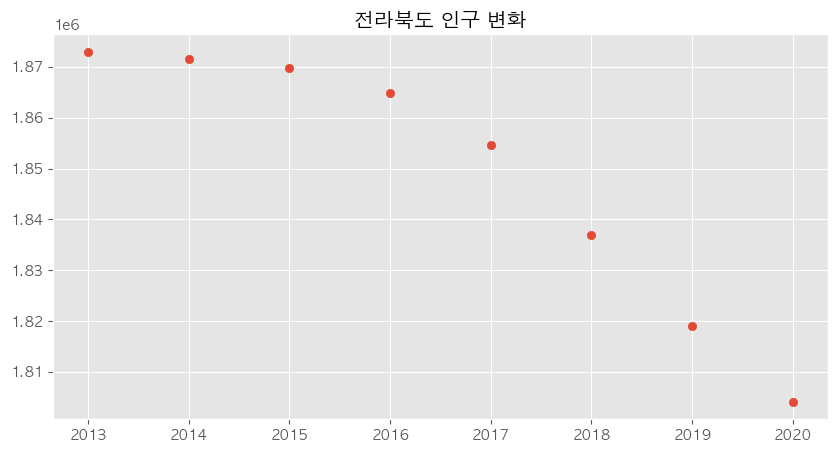

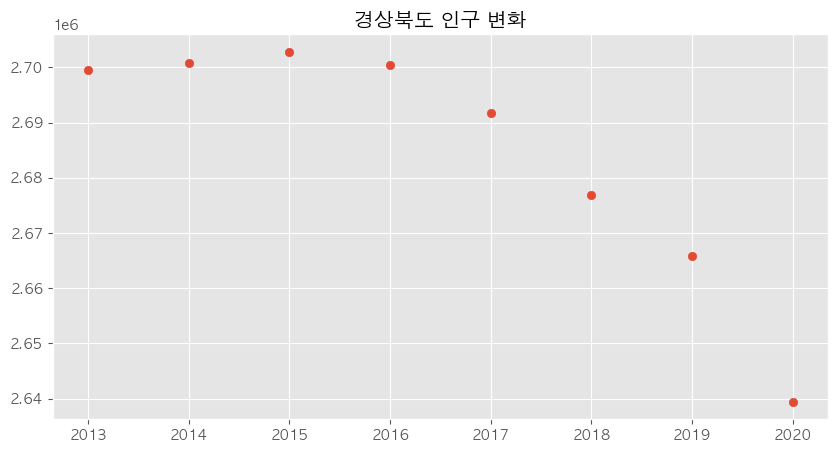

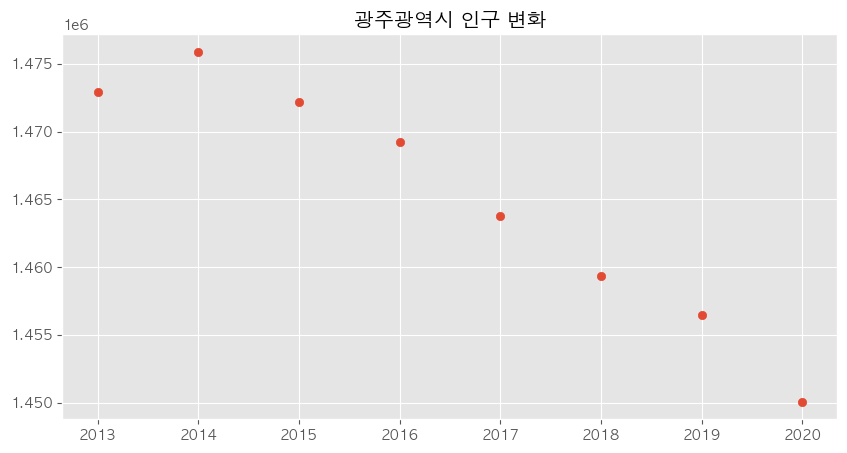

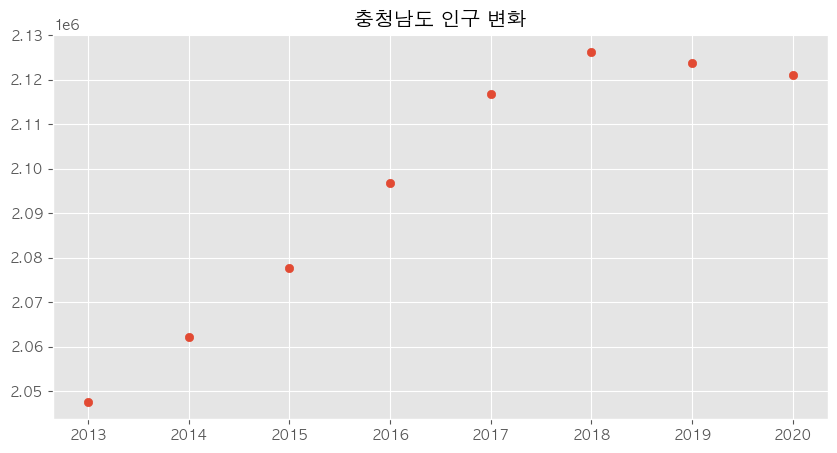

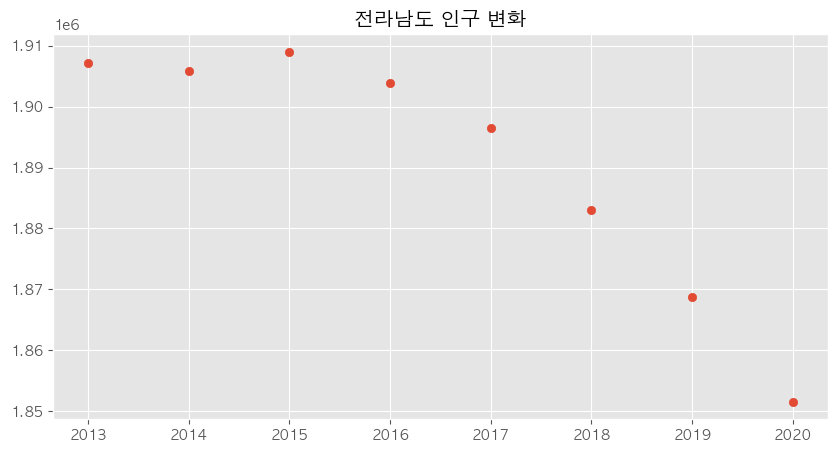

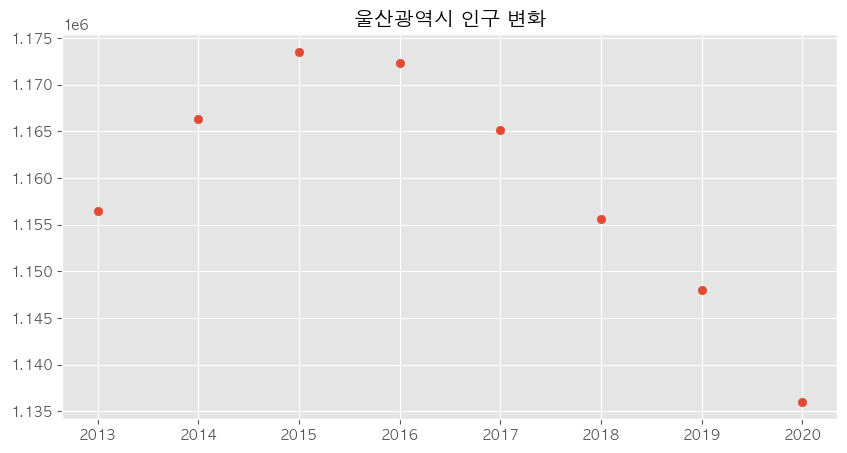

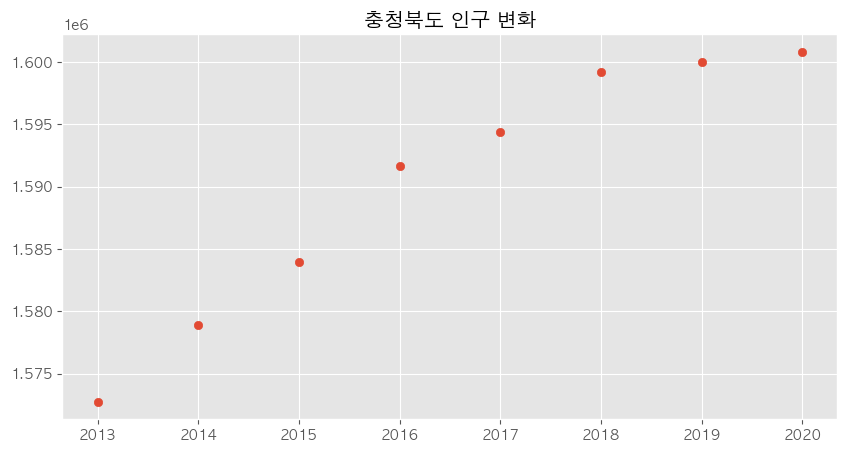

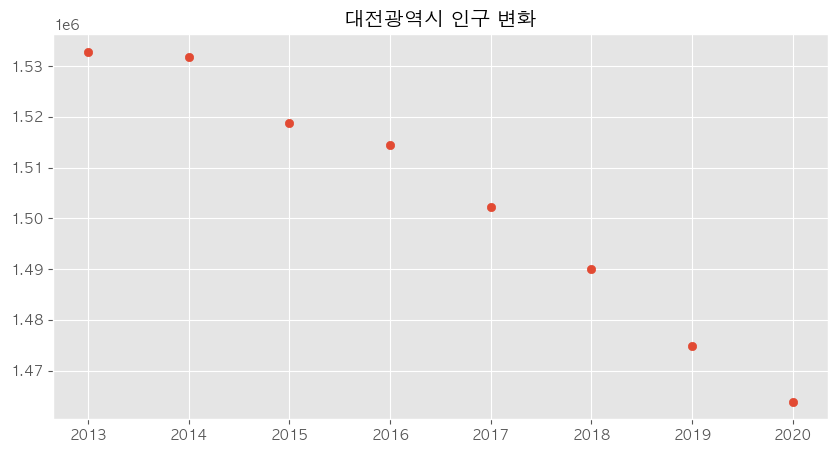

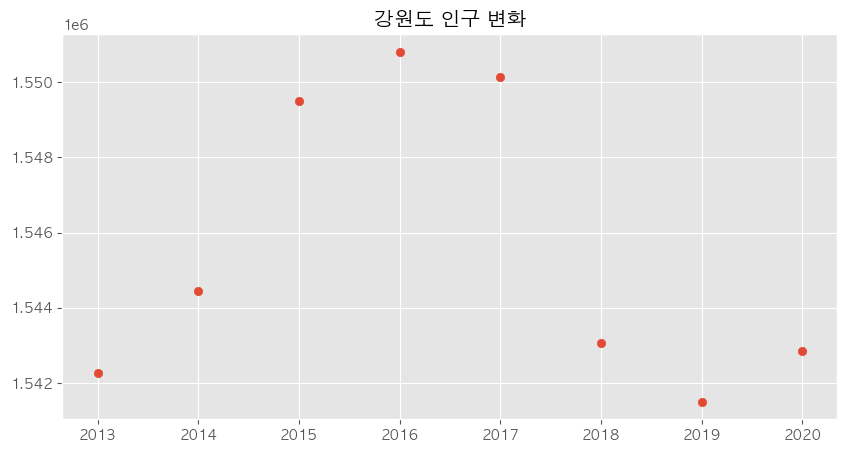

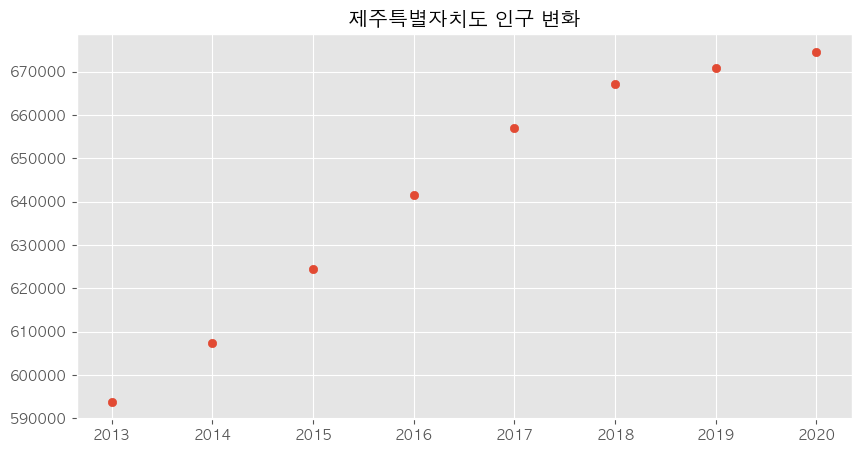

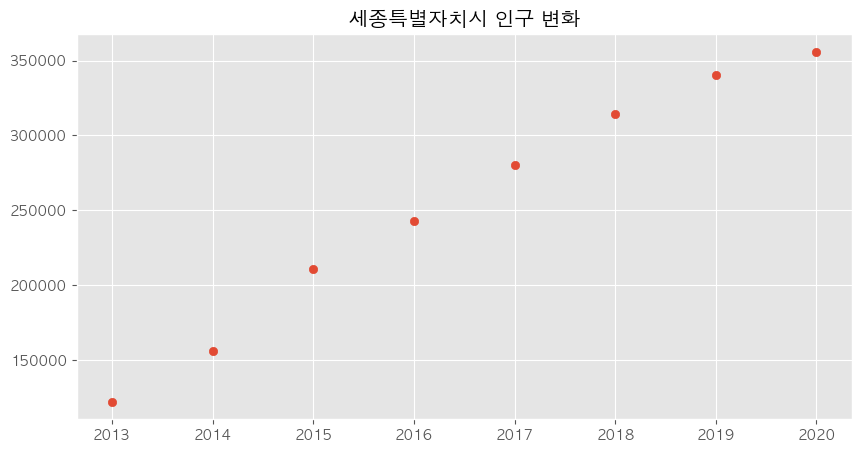

In [405]:
area = list(tongtong['시도'].unique())
for sido in area:
    plt.figure(figsize=(10,5))
    plt.scatter(
        tongtong[tongtong['시도']==sido].index, 
        tongtong[tongtong['시도']==sido]['총인구'],#< target
        )
    plt.title('%s 인구 변화'%sido)
    plt.show()

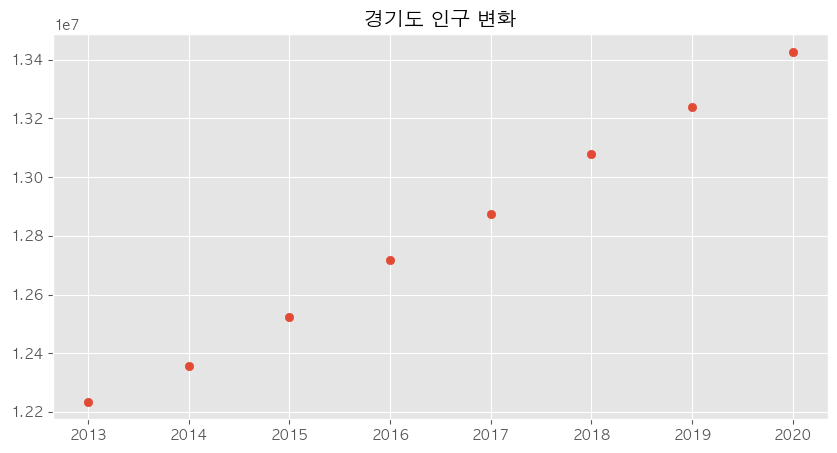

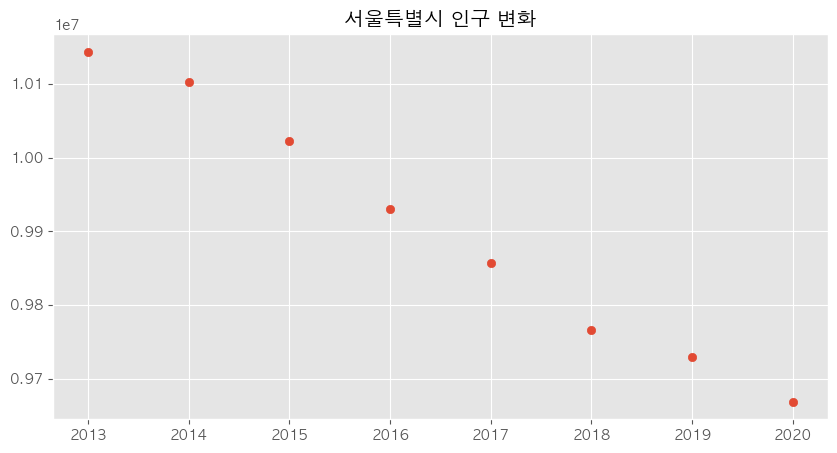

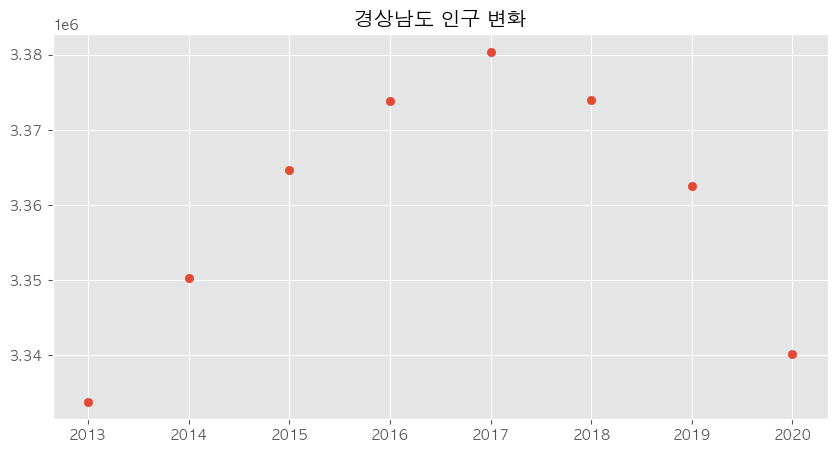

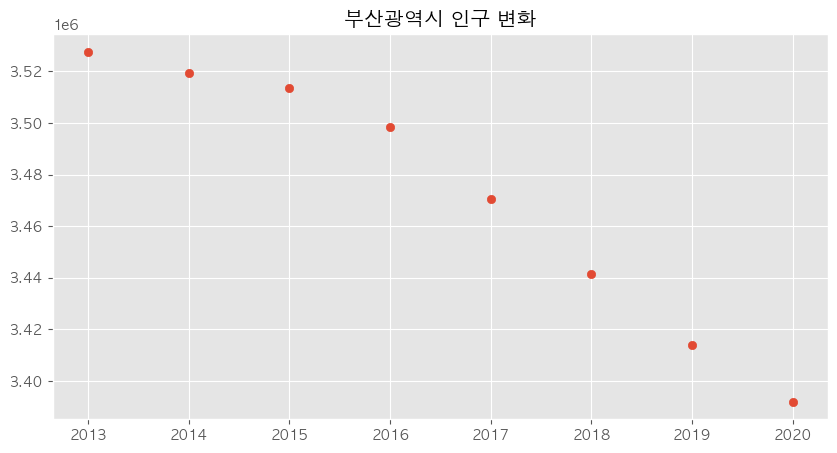

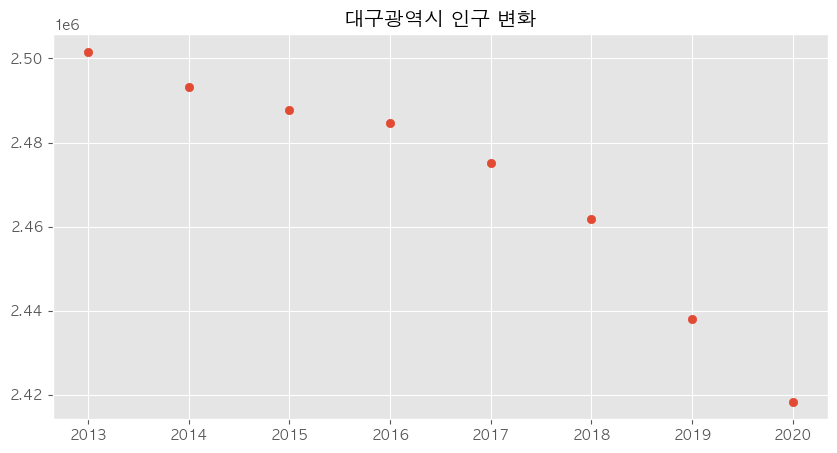

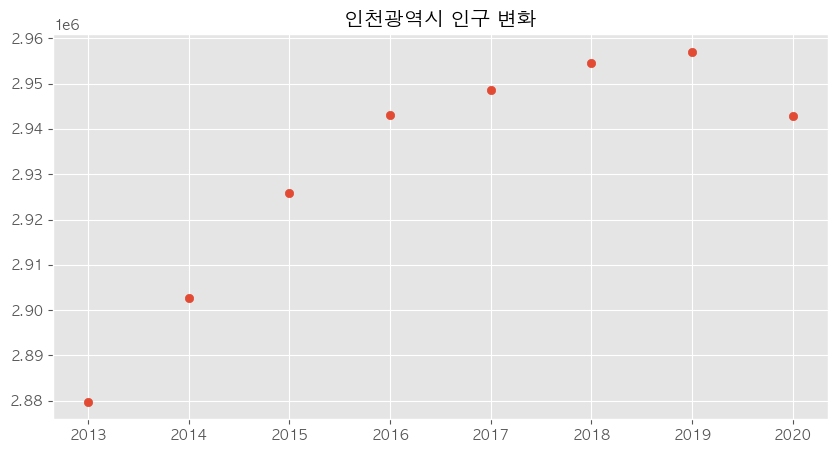

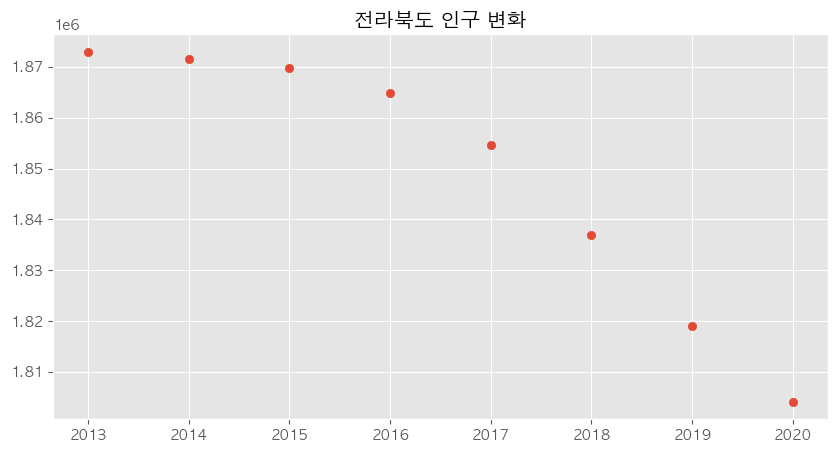

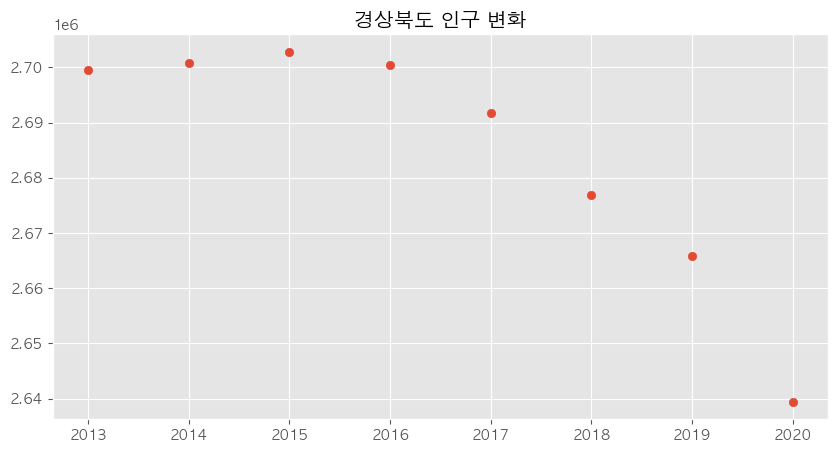

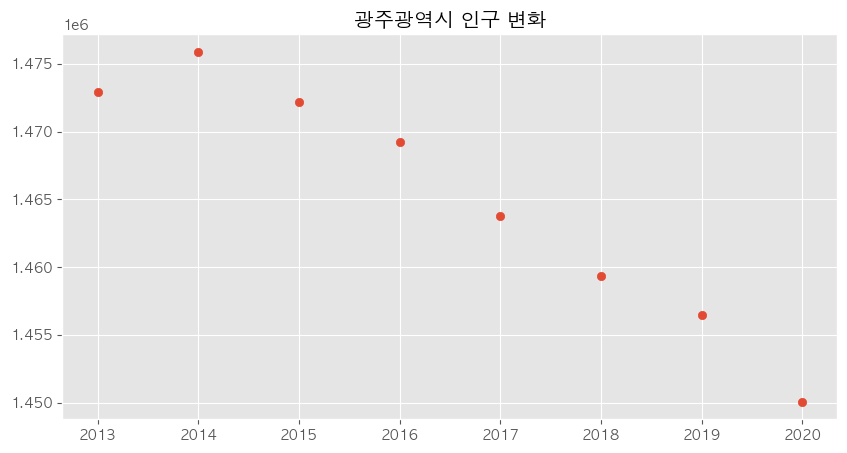

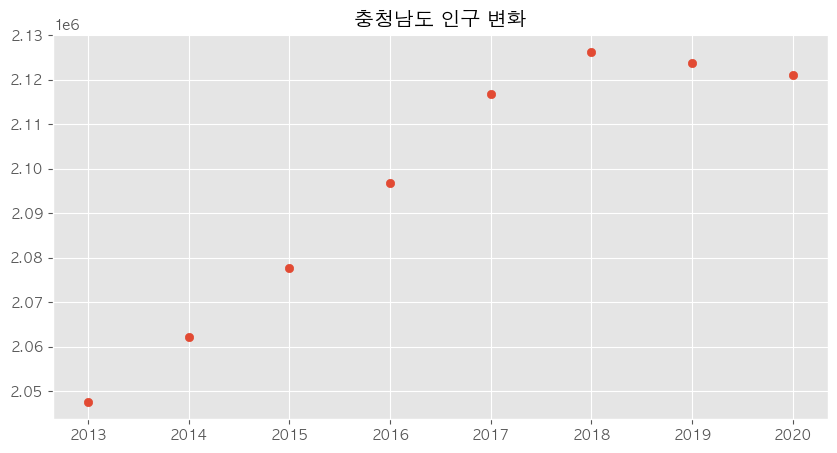

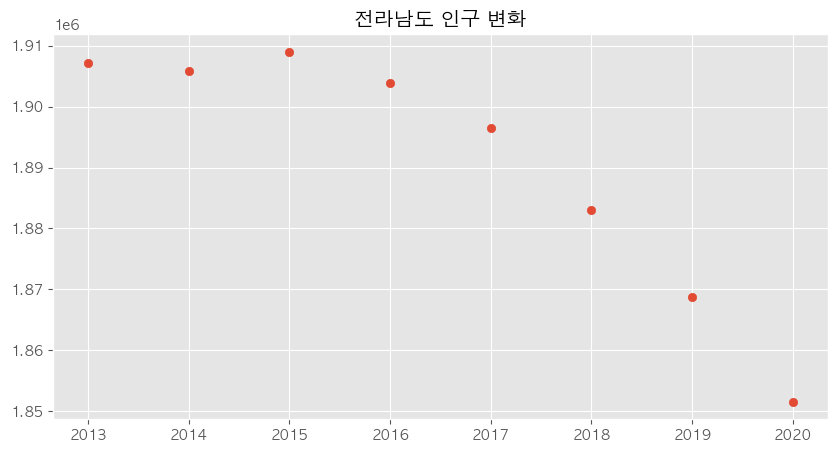

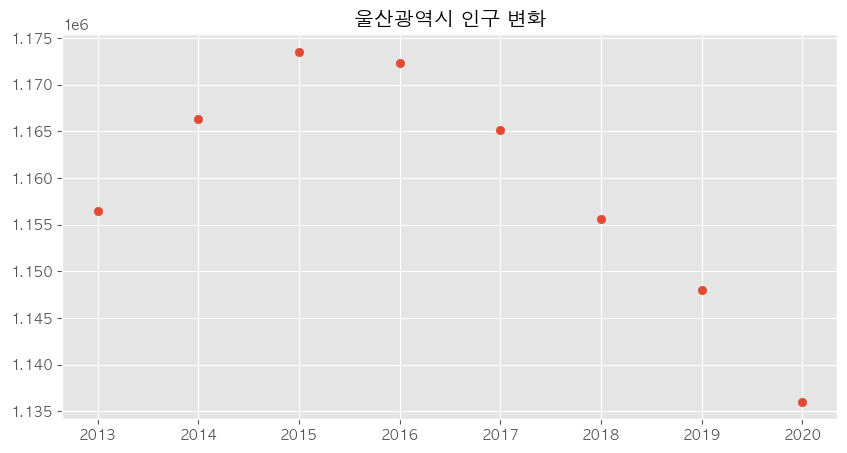

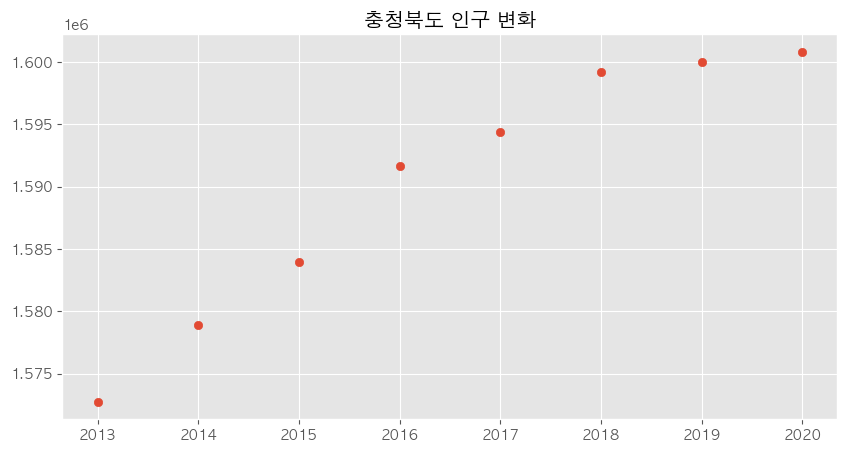

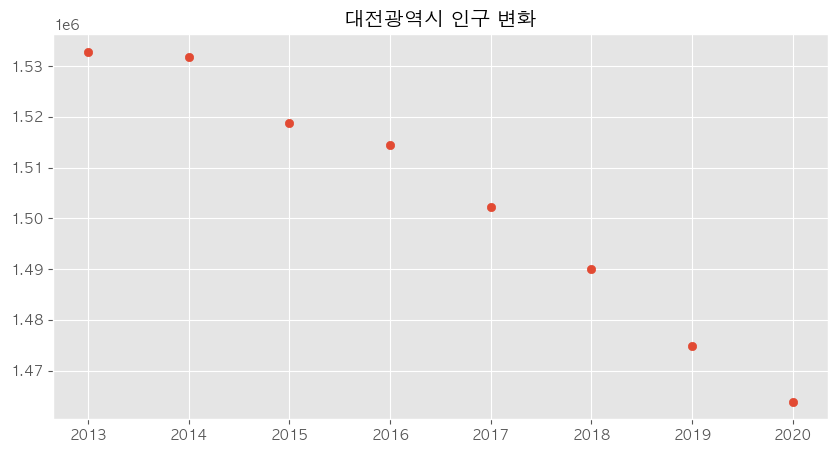

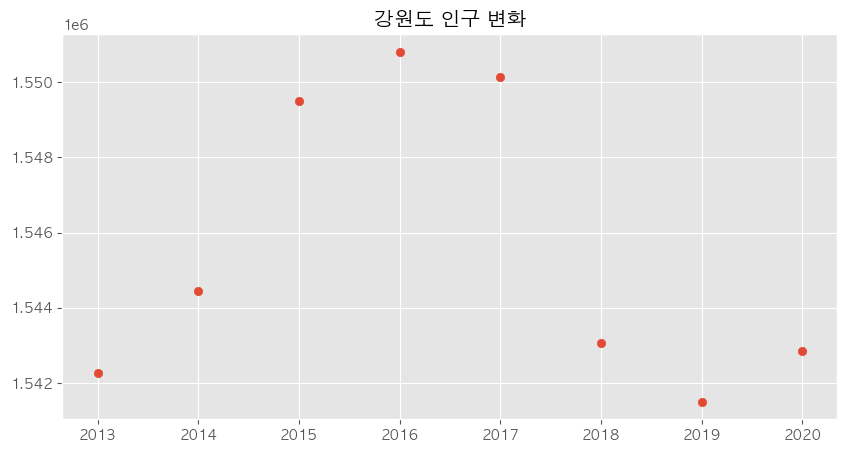

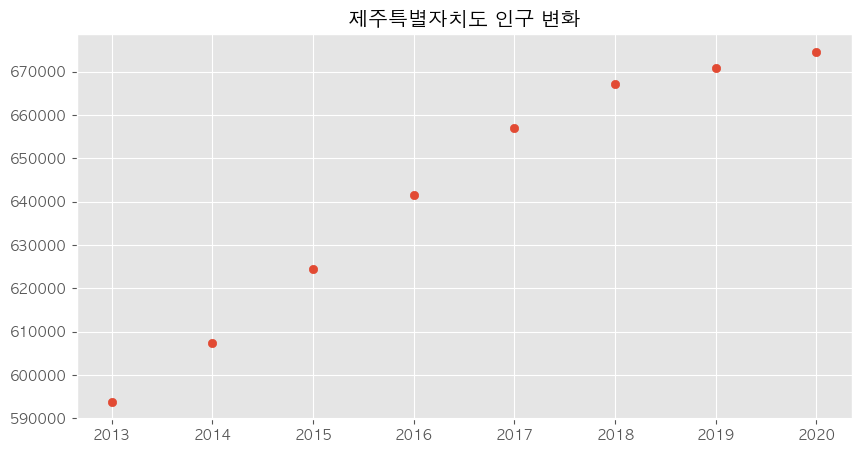

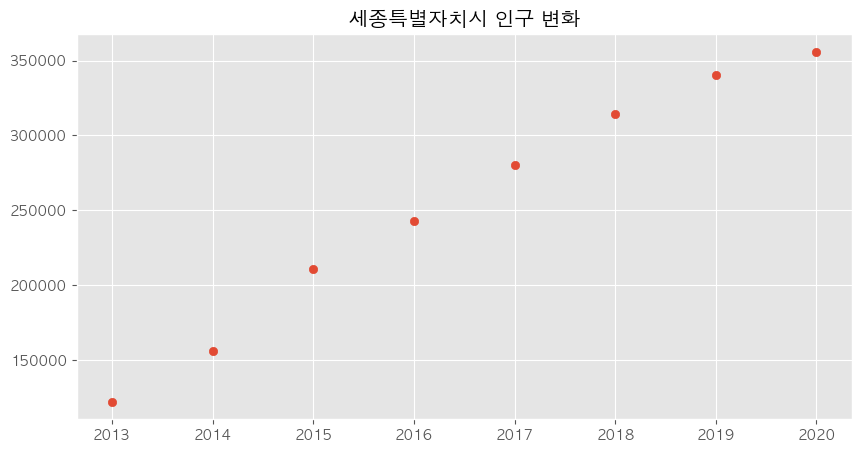

In [406]:
area = list(tongtong['시도'].unique())
for sido in area:
    plt.figure(figsize=(10,5))
    plt.scatter(
        tongtong[tongtong['시도']==sido].index, 
        tongtong[tongtong['시도']==sido]['총인구'],#< target
        )
    plt.title('%s 인구 변화'%sido)
    plt.show()

In [407]:
colors = ['red','green','blue','firebrick','black','skyblue','coral','darkviolet','mediumspringgreen','navy','yellow','pink','darkgreen','palevioletred']
len(colors)

14

In [408]:
tongtong
# tongtong['시도'].unique()

,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액
년도,,,,,,,,,
2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5
2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2
2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3
2013,부산광역시,3527635,496161,25831,82,160821,13902,77411.6,59554.5
2013,대구광역시,2501588,363224,19340,86,136309,9981,46578.5,37541.7
...,...,...,...,...,...,...,...,...,...
2020,충청북도,1600837,226441,8607,40,85135,6103,28669.1,27669.5
2020,대전광역시,1463882,243418,7481,44,79807,6405,39341.3,38725.4
2020,강원도,1542840,217897,7835,32,73478,5554,22831.4,23634.2


In [409]:
sudogwan = ['경기도', '서울특별시','인천광역시']
testdf = pd.DataFrame([
    tongtong[tongtong['시도'] == '경기도']['총인구'] +\
    tongtong[tongtong['시도'] == '서울특별시']['총인구']+\
    tongtong[tongtong['시도'] == '인천광역시']['총인구']
    ],
    index=tongtong.index,
    columns=['총인구']
)
testdf

,총인구
년도,
2013,NaN
2013,NaN
2013,NaN
2013,NaN
2013,NaN
...,...
2020,NaN
2020,NaN
2020,NaN


In [410]:
tongtong[tongtong['시도'] == '경기도']['총인구'] +\
tongtong[tongtong['시도'] == '서울특별시']['총인구']+\
tongtong[tongtong['시도'] == '인천광역시']['총인구']

년도
2013    25258057
2014    25363671
2015    25470602
2016    25590465
2017    25679863
2018    25797418
2019    25925799
2020    26038307
Name: 총인구, dtype: int64

In [411]:
# tongtongPivot = pd.pivot_table(, index = tongtong.index, aggfunc = 'sum')
# tongtongPivot

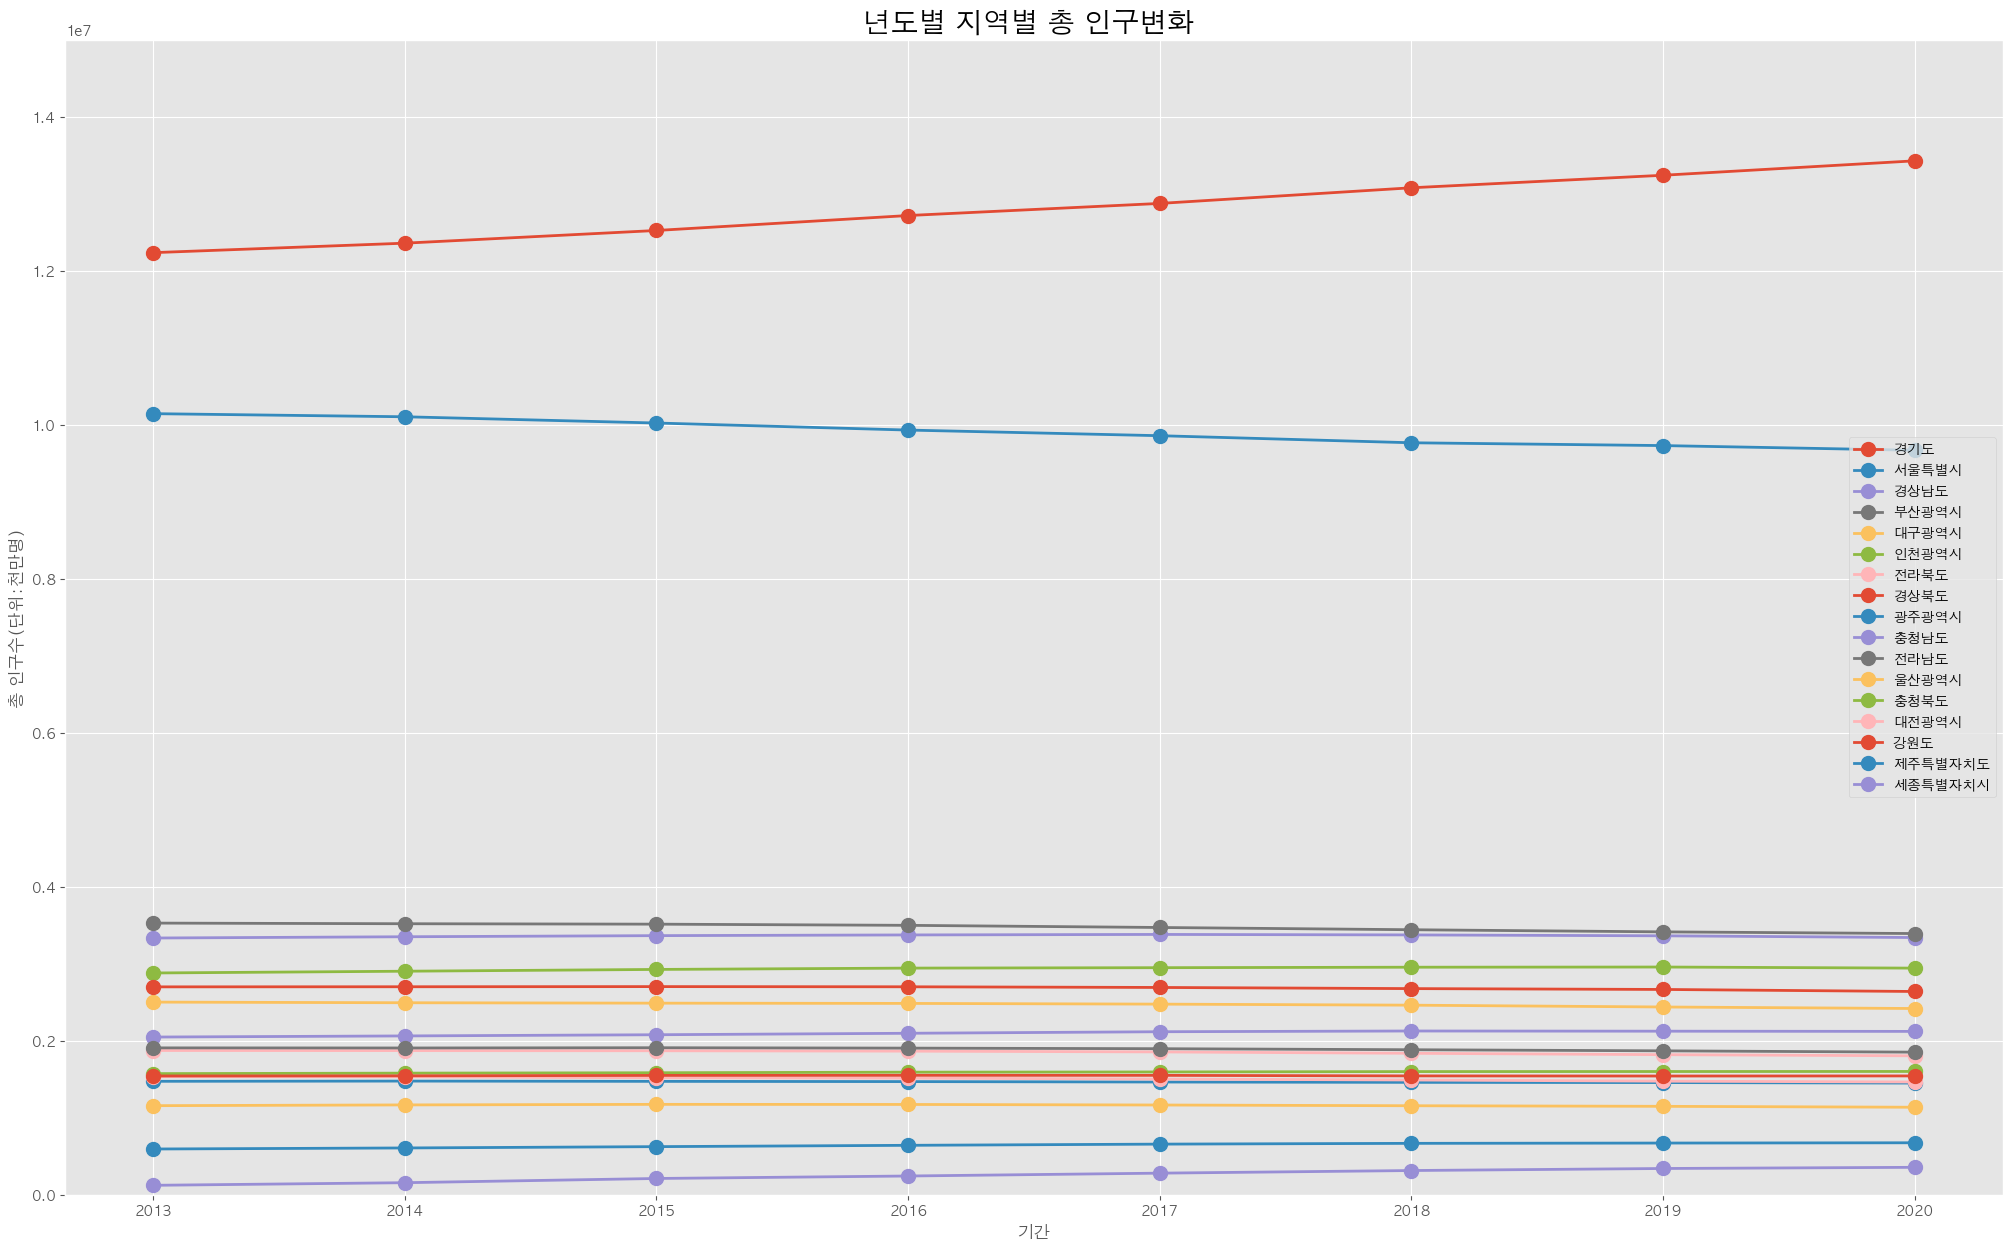

In [412]:
plt.style.use("ggplot")
colors = ['red','green','blue','firebrick','black','skyblue','coral','darkviolet','mediumspringgreen','navy','yellow','pink','darkgreen','palevioletred']
area = list(tongtong['시도'].unique())
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(1,1,1)
for sido in area:
    ax.plot(
        tongtong[tongtong['시도']==sido].index,
        tongtong[tongtong['시도']==sido]['총인구'],
        marker="o",
        # markerfacecolor="green",
        markersize=10,
        # color="olive",
        # color=colors,
        linewidth=2,
        label=sido
    )

ax.legend(loc="center right")
ax.set_title("년도별 지역별 총 인구변화 ", size=20)
ax.set_xlabel("기간", size=12)
ax.set_ylabel("총 인구수(단위:천만명)", size=12)
ax.set_ylim(0,15000000)
# ax.set_xticklabels(df_3.columns, rotation=90)

plt.show()

In [413]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(통합3)
km.labels_

array([0, 0, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

In [414]:
tonghap=통합3.copy()

In [415]:
tonghap['cluster_id'] = km.labels_

In [416]:
ingu = list(tonghap[tonghap.index==2013]['총인구'])
notingu = tonghap[tonghap.columns.difference(['총인구','cluster_id'])]

In [417]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [418]:
print(list(tonghap.index))
print(tonghap.info())

[2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 2013 to 2020
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       -------------- 

In [419]:
# notingu = tonghap[tonghap.columns.difference(['총인구','cluster_id'])]
bbangu =tonghap[tonghap.columns.difference(['총인구','cluster_id'])]
columns = list(bbangu.columns)

In [420]:
List = list(tonghap.index)

In [421]:

dfScaled = scaler.fit_transform(bbangu)
dfScaled = pd.DataFrame(dfScaled)
dfScaled.columns = columns
dfScaled['cluster_ID'] = km.labels_
# dfScaled.set_index(keys=List, inplace=True)

In [422]:
dfScaled

,도매 및 소매업 신생,산부인과의원수,예금액,예금은행대출금액,전출인구,초등학생인원수,출생아수,cluster_ID
0,0.776750,0.722646,0.013776,0.339958,0.917273,0.960500,0.987845,0
1,0.760073,1.000000,0.592332,0.635611,0.815367,0.606175,0.738139,0
2,0.194295,0.160305,0.005956,0.075801,0.207586,0.240051,0.252643,2
3,0.214863,0.203562,0.064875,0.103605,0.244302,0.201574,0.219960,2
4,0.152346,0.213740,0.040335,0.061002,0.176790,0.169433,0.162203,2
...,...,...,...,...,...,...,...,...
131,0.090515,0.096692,0.029329,0.036256,0.107325,0.102333,0.066700,1
132,0.095330,0.106870,0.041654,0.051002,0.115946,0.095347,0.056681,1
133,0.081762,0.076336,0.024831,0.028190,0.102986,0.087049,0.059831,1
134,0.038744,0.053435,0.014119,0.024530,0.040438,0.043906,0.025609,1


In [423]:
list(dfScaled.columns)

['도매 및 소매업 신생',
 '산부인과의원수',
 '예금액',
 '예금은행대출금액',
 '전출인구',
 '초등학생인원수',
 '출생아수',
 'cluster_ID']

In [424]:
featureNames = ['도매 및 소매업 신생',
 '산부인과의원수',
 '예금액',
 '예금은행대출금액',
 '전출인구',
 '초등학생인원수',
 '출생아수']
targetName = ['cluster_ID']

featrue = dfScaled[featureNames]
target = dfScaled[targetName]

In [425]:
featrue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   도매 및 소매업 신생  136 non-null    float64
 1   산부인과의원수      136 non-null    float64
 2   예금액          136 non-null    float64
 3   예금은행대출금액     136 non-null    float64
 4   전출인구         136 non-null    float64
 5   초등학생인원수      136 non-null    float64
 6   출생아수         136 non-null    float64
dtypes: float64(7)
memory usage: 7.6 KB


In [426]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   cluster_ID  136 non-null    int32
dtypes: int32(1)
memory usage: 672.0 bytes


In [427]:
trainData, testData, trainTarget, testTarget = train_test_split(featrue, target, test_size=0.2) 

In [428]:
# 잘 짤라졌나 확인 
print(trainData.shape)
print(testData.shape)
print(trainTarget.shape)
print(testTarget.shape)

(108, 7)
(28, 7)
(108, 1)
(28, 1)


In [429]:
x_train, x_valid, y_train, y_valid = train_test_split(trainData, trainTarget, test_size=0.2)

In [430]:

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(86, 7)
(22, 7)
(86, 1)
(22, 1)


In [431]:
from sklearn.model_selection import cross_validate # 
from sklearn.ensemble import RandomForestRegressor ## Regressor!

In [432]:

rf = RandomForestRegressor(n_jobs = -1)
scores = cross_validate(rf, x_train, y_train, return_train_score=True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

# 0.9988809757253317 0.9953617382816933

0.9980853393497116 0.987665017851533


/Users/luchesia/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/luchesia/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/luchesia/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/luchesia/miniforge3/envs/tensorflow/lib

In [433]:
from sklearn import svm
clf = svm.SVC()
scores = cross_validate(clf, x_train, y_train, return_train_score=True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

# 0.9767689684569479 0.9660130718954247

/Users/luchesia/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luchesia/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luchesia/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.970929241261722 0.9764705882352942


/Users/luchesia/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luchesia/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [434]:
# LR 실행하기
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(trainData, trainTarget)
scores = cross_validate(lr, x_train, y_train, return_train_score=True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))
#= 0.7092497868712702 0.6862745098039216

0.7092924126172209 0.7091503267973857


/Users/luchesia/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luchesia/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luchesia/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luchesia/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversio

In [435]:
lr.predict(trainData)

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1,
       0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 0],
      dtype=int32)

In [436]:
# 확률한번 봐보자
lr.predict_proba(trainData[:5])

array([[0.01409025, 0.69634487, 0.28956488],
       [0.01182596, 0.72024803, 0.267926  ],
       [0.01366835, 0.70042801, 0.28590364],
       [0.00654386, 0.79508877, 0.19836737],
       [0.85724279, 0.00100979, 0.14174742]])

In [437]:
# 클래스 종류
lr.classes_

array([0, 1, 2], dtype=int32)

In [438]:
# 회귀식의 기울기(가중치) 확인하기
print(lr.coef_, lr.intercept_)

[[ 1.27895667  1.32206762  0.50934962  0.99179716  1.44368343  1.30556519
   1.24032493]
 [-1.49846214 -1.3760227  -0.2462344  -1.13043136 -1.62539617 -1.47660937
  -1.37557686]
 [ 0.21950547  0.05395509 -0.26311522  0.1386342   0.18171274  0.17104417
   0.13525193]] [-3.02585811  2.38270093  0.64315718]


In [439]:
# 다중식으로 계산
decisions = lr.decision_function(trainData[:5])
decisions

array([[-2.30775277,  1.59260922,  0.71514355],
       [-2.40990391,  1.69939436,  0.71050955],
       [-2.32572682,  1.61088179,  0.71484503],
       [-2.73717344,  2.06275326,  0.67442018],
       [ 2.84788448, -3.8960945 ,  1.04821002]])

In [440]:
# Sigmoid 함수에 대입하여 확률값을 구한다.
from scipy.special import expit # <sigmoid 
print(expit(decisions))

[[0.09048291 0.83098289 0.6715367 ]
 [0.08242058 0.84545562 0.67051374]
 [0.08901457 0.83353378 0.67147085]
 [0.06081515 0.88722994 0.6624922 ]
 [0.94520923 0.0199164  0.74043103]]


In [441]:
lr.predict_proba(trainData[:5])

array([[0.01409025, 0.69634487, 0.28956488],
       [0.01182596, 0.72024803, 0.267926  ],
       [0.01366835, 0.70042801, 0.28590364],
       [0.00654386, 0.79508877, 0.19836737],
       [0.85724279, 0.00100979, 0.14174742]])

In [443]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(x_train, y_train)
print('Train score :',kn.score(x_train, y_train))
print('Test score :',kn.score(trainData, trainTarget))

Train score : 1.0
Test score : 1.0


In [444]:
dfScaled

,도매 및 소매업 신생,산부인과의원수,예금액,예금은행대출금액,전출인구,초등학생인원수,출생아수,cluster_ID
0,0.776750,0.722646,0.013776,0.339958,0.917273,0.960500,0.987845,0
1,0.760073,1.000000,0.592332,0.635611,0.815367,0.606175,0.738139,0
2,0.194295,0.160305,0.005956,0.075801,0.207586,0.240051,0.252643,2
3,0.214863,0.203562,0.064875,0.103605,0.244302,0.201574,0.219960,2
4,0.152346,0.213740,0.040335,0.061002,0.176790,0.169433,0.162203,2
...,...,...,...,...,...,...,...,...
131,0.090515,0.096692,0.029329,0.036256,0.107325,0.102333,0.066700,1
132,0.095330,0.106870,0.041654,0.051002,0.115946,0.095347,0.056681,1
133,0.081762,0.076336,0.024831,0.028190,0.102986,0.087049,0.059831,1
134,0.038744,0.053435,0.014119,0.024530,0.040438,0.043906,0.025609,1


In [ ]:
# 시각화로 눈으로 먼저 함 봐보자

sns.lmplot(
    x='height',
    y='weight', 
    data=dfScaled, 
    fit_reg=False, 
    scatter_kws={'s':200},
    hue = 'cluster_id'
    )
plt.show()